# Google Play Store Analysis

                                            By: Abhishek Nagle

In [319]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pylab import rcParams

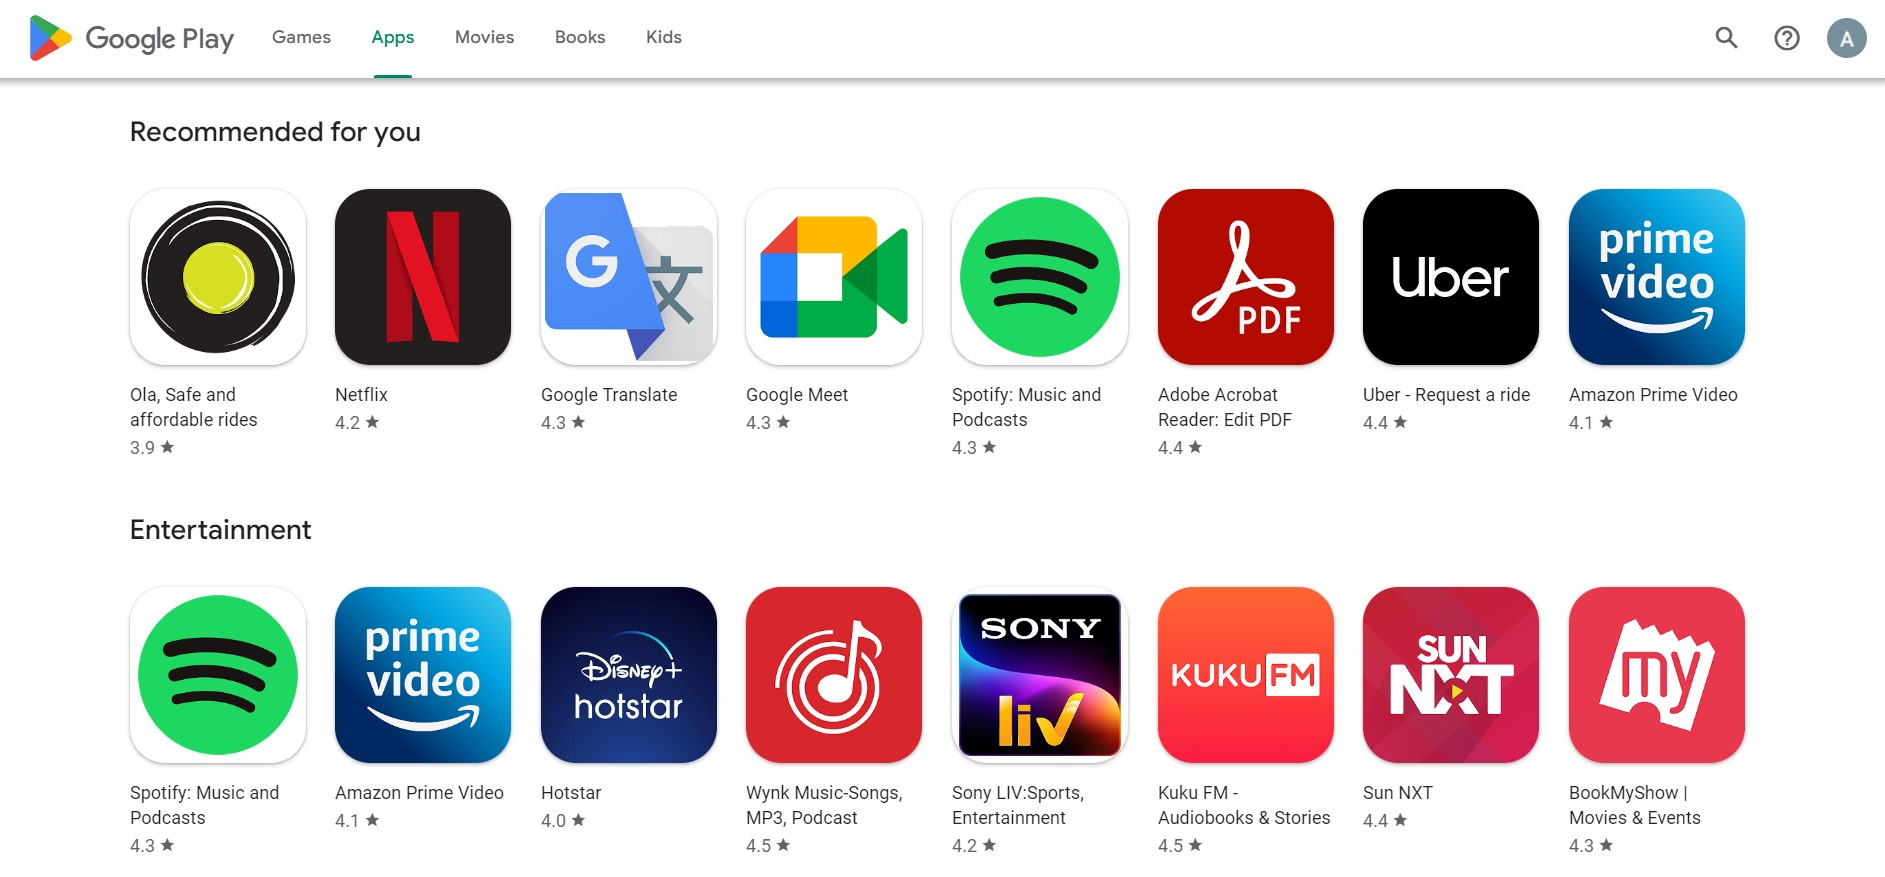

In [320]:
from IPython.display import Image
Image(filename ='PlayStore_2.jpg', width=1000, height = 500)

In [321]:
%matplotlib inline
warnings.filterwarnings('ignore')

In [322]:
plt.style.use('ggplot')
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


## Importing Data

In [323]:
df = pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [324]:
print('The Shape of the Data is',df.shape)

The Shape of the Data is (10841, 13)


### 1. What is download rate by categories ?

In [325]:
gk = df.groupby('Category')
gk['Rating'].mean()

Category
1.9                    19.000000
ART_AND_DESIGN          4.358065
AUTO_AND_VEHICLES       4.190411
BEAUTY                  4.278571
BOOKS_AND_REFERENCE     4.346067
BUSINESS                4.121452
COMICS                  4.155172
COMMUNICATION           4.158537
DATING                  3.970769
EDUCATION               4.389032
ENTERTAINMENT           4.126174
EVENTS                  4.435556
FAMILY                  4.192272
FINANCE                 4.131889
FOOD_AND_DRINK          4.166972
GAME                    4.286326
HEALTH_AND_FITNESS      4.277104
HOUSE_AND_HOME          4.197368
LIBRARIES_AND_DEMO      4.178462
LIFESTYLE               4.094904
MAPS_AND_NAVIGATION     4.051613
MEDICAL                 4.189143
NEWS_AND_MAGAZINES      4.132189
PARENTING               4.300000
PERSONALIZATION         4.335987
PHOTOGRAPHY             4.192114
PRODUCTIVITY            4.211396
SHOPPING                4.259664
SOCIAL                  4.255598
SPORTS                  4.223511
T

  ### 2. What is the name of the 15 most downloaded applications?

In [326]:
col_name = df.sort_values(by=['Installs'])
apps = pd.DataFrame(col_name['App'].tail(15))
apps

,App
3703,MX Player
7536,"Security Master - Antivirus, VPN, AppLock, Boo..."
3711,MX Player
3265,Gboard - the Google Keyboard
403,LINE: Free Calls & Messages
3533,Google Calendar
3255,SHAREit - Transfer & Share
4365,MX Player
3522,Microsoft Word
4039,Google Duo - High Quality Video Calls


### 3. What is the download rate for paid applications? 

In [327]:
paid = df[df['Type']=='Paid']
paid.count()

App               800
Category          800
Rating            647
Reviews           800
Size              800
Installs          800
Type              800
Price             800
Content Rating    800
Genres            800
Last Updated      800
Current Ver       798
Android Ver       799
dtype: int64

<AxesSubplot:>

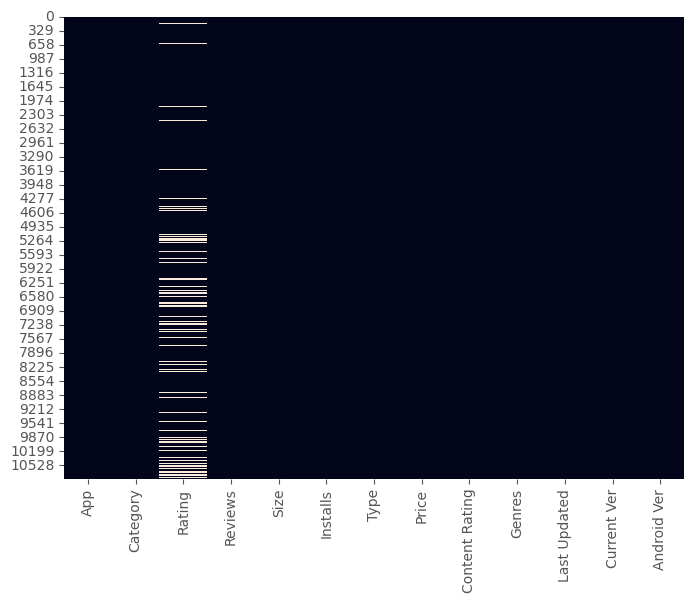

In [328]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar = False)

In [329]:
total = df.isnull().sum().sort_values(ascending  = False)
percentage = (df.isnull().sum()/df.count()).sort_values(ascending = False)
temp = pd.concat([total, percentage], axis = 1,keys = ['total','percentage'])
temp.head()

,total,percentage
Rating,1474,0.157361
Current Ver,8,0.000738
Android Ver,3,0.000277
Type,1,0.000092
Content Rating,1,0.000092


In [330]:
# Dropping Down all the observation containing missing values
df.dropna(how = 'any', inplace = True)

## Checking the duplicate values

In [331]:
print("Number of unique App names = ", len(df['App'].unique()))
print("Number of the total App name = ", df.shape[0])
print("Duplicate Apps = ", len(df['App']) - len(df['App'].unique()))

Number of unique App names =  8190
Number of the total App name =  9360
Duplicate Apps =  1170


In [332]:
# Checking how the duplicate value looks like
df[df['App']== 'Coloring book moana']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2033,Coloring book moana,FAMILY,3.9,974,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


4. Sort by Category

In [333]:
# Sort by Category
abc = df.sort_values(by="Category")
abc

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
35,How to draw Ladybug and Cat Noir,ART_AND_DESIGN,3.8,564,9.2M,"100,000+",Free,0,Everyone,Art & Design,"July 11, 2018",2.1,4.1 and up
36,UNICORN - Color By Number & Pixel Art Coloring,ART_AND_DESIGN,4.7,8145,24M,"500,000+",Free,0,Everyone,Art & Design;Creativity,"August 2, 2018",1.0.9,4.4 and up
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,"5,000,000+",Free,0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up
38,PIP Camera - PIP Collage Maker,ART_AND_DESIGN,4.7,158,11M,"10,000+",Free,0,Everyone,Art & Design,"November 29, 2017",1.3,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8153,WebCams,WEATHER,4.6,3963,23M,"100,000+",Free,0,Everyone,Weather,"July 17, 2018",5.2.11,4.2 and up
3645,Rainfall radar - weather,WEATHER,3.7,26941,Varies with device,"5,000,000+",Free,0,Everyone,Weather,"July 13, 2018",Varies with device,Varies with device
3646,Yahoo! Weather for SH Forecast for understandi...,WEATHER,4.2,7457,Varies with device,"1,000,000+",Free,0,Everyone,Weather,"August 2, 2018",Varies with device,Varies with device
8745,World Webcams,WEATHER,3.7,7896,Varies with device,"1,000,000+",Free,0,Everyone,Weather,"November 25, 2013",1.6,Varies with device


### 5. What is the download rate and user rating by category?

In [334]:
abc = df['Rating'].groupby(df['Category'])
abc.mean()

Category
ART_AND_DESIGN         4.377049
AUTO_AND_VEHICLES      4.190411
BEAUTY                 4.278571
BOOKS_AND_REFERENCE    4.346067
BUSINESS               4.121452
COMICS                 4.155172
COMMUNICATION          4.158537
DATING                 3.970769
EDUCATION              4.389032
ENTERTAINMENT          4.126174
EVENTS                 4.435556
FAMILY                 4.192383
FINANCE                4.131889
FOOD_AND_DRINK         4.166972
GAME                   4.286326
HEALTH_AND_FITNESS     4.277104
HOUSE_AND_HOME         4.197368
LIBRARIES_AND_DEMO     4.179688
LIFESTYLE              4.094904
MAPS_AND_NAVIGATION    4.051613
MEDICAL                4.189143
NEWS_AND_MAGAZINES     4.132189
PARENTING              4.300000
PERSONALIZATION        4.335256
PHOTOGRAPHY            4.192114
PRODUCTIVITY           4.211396
SHOPPING               4.259664
SOCIAL                 4.255598
SPORTS                 4.223511
TOOLS                  4.047203
TRAVEL_AND_LOCAL       4.109292

# EDA (Exploratory Data Analysis)

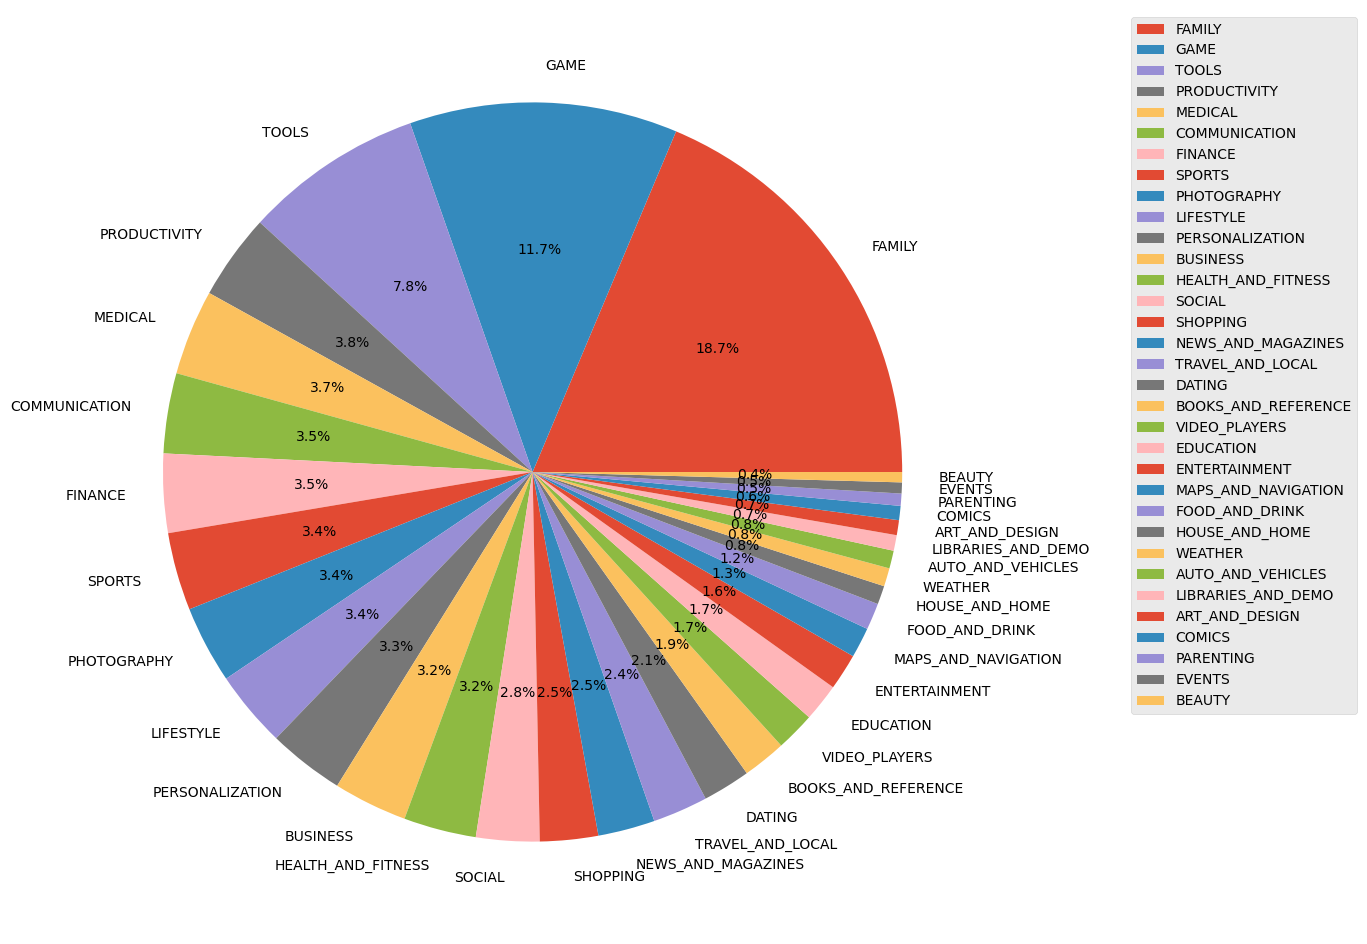

In [335]:
temp = df['Category'].value_counts().reset_index()
plt.figure(figsize=(12, 12))
ax = plt.subplot(111)
plt.pie(x = temp['Category'], labels = temp['index'],autopct = '%1.1f%%')
plt.legend()
ax.legend(bbox_to_anchor=(1.4, 1))
plt.show()

#### Observation: (Pie Chart) The Family, Events and Tools are the most dominating applications in the playstore.

Number of Apps per category


FAMILY                 1746
GAME                   1097
TOOLS                   733
PRODUCTIVITY            351
MEDICAL                 350
COMMUNICATION           328
FINANCE                 323
SPORTS                  319
PHOTOGRAPHY             317
LIFESTYLE               314
PERSONALIZATION         312
BUSINESS                303
HEALTH_AND_FITNESS      297
SOCIAL                  259
SHOPPING                238
NEWS_AND_MAGAZINES      233
TRAVEL_AND_LOCAL        226
DATING                  195
BOOKS_AND_REFERENCE     178
VIDEO_PLAYERS           160
EDUCATION               155
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     124
FOOD_AND_DRINK          109
HOUSE_AND_HOME           76
WEATHER                  75
AUTO_AND_VEHICLES        73
LIBRARIES_AND_DEMO       64
ART_AND_DESIGN           61
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

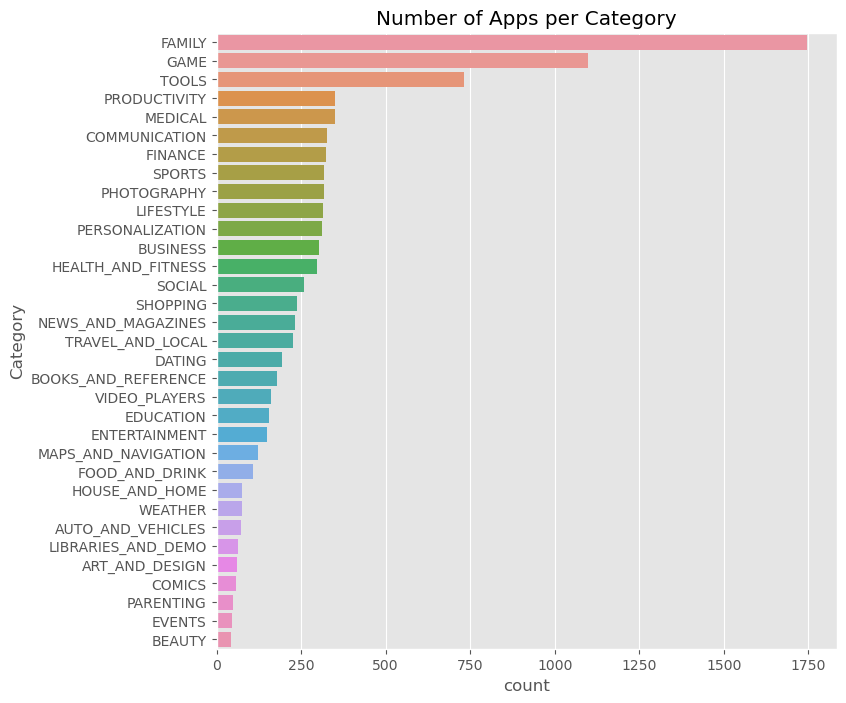

In [336]:
#Exploring the number of apps per category in the Google Playstore

print('Number of Apps per category')
display(df.Category.value_counts())
fig=plt.figure(figsize=(8, 8))
a = sns.countplot(y = df.Category,order = df.Category.value_counts().index, data = df).set_title('Number of Apps per Category')

## CATEGORY

Plot the distribution of number of applications in each category

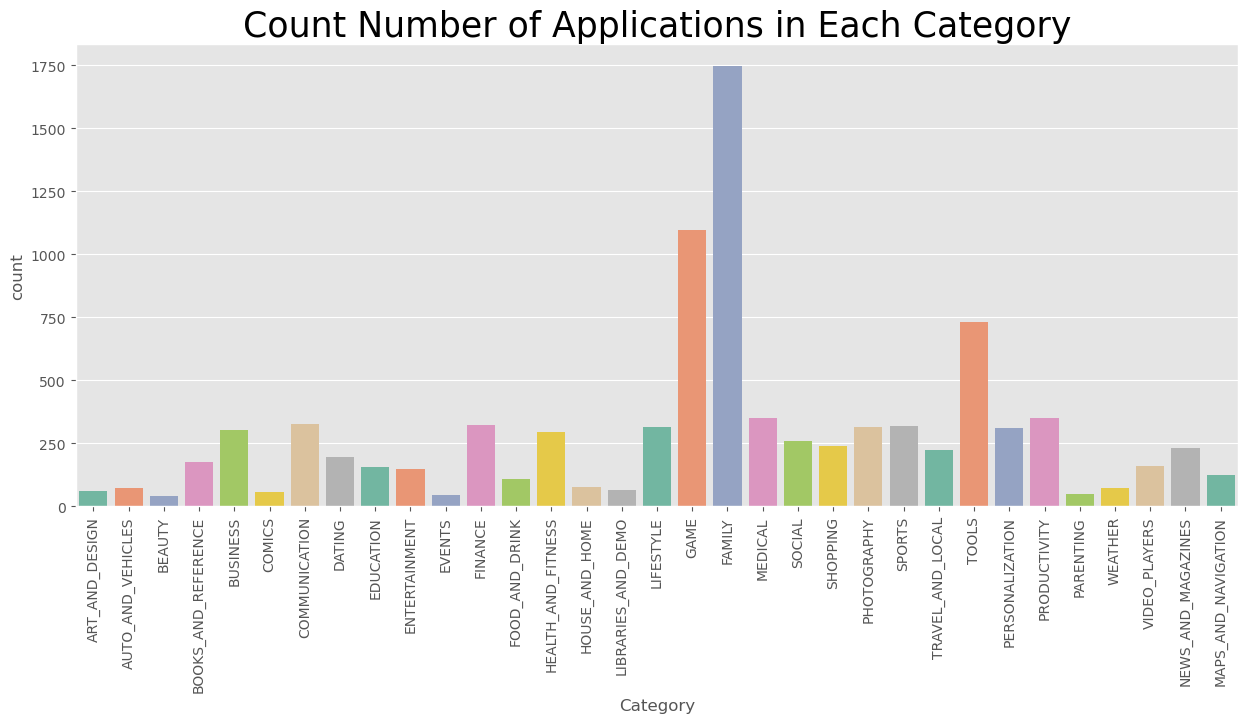

In [337]:
plt.figure(figsize=(15,6))
plt.title('Count Number of Applications in Each Category',size = 25)
category = sns.countplot(x=df['Category'], palette="Set2")
category.set_xticklabels(category.get_xticklabels(),rotation=90)
plt.show(category)

#### Catergory FAMILY has most applications, and category GAME and TOOLS also have a lot of applications.

#### Plot the ratings for each category

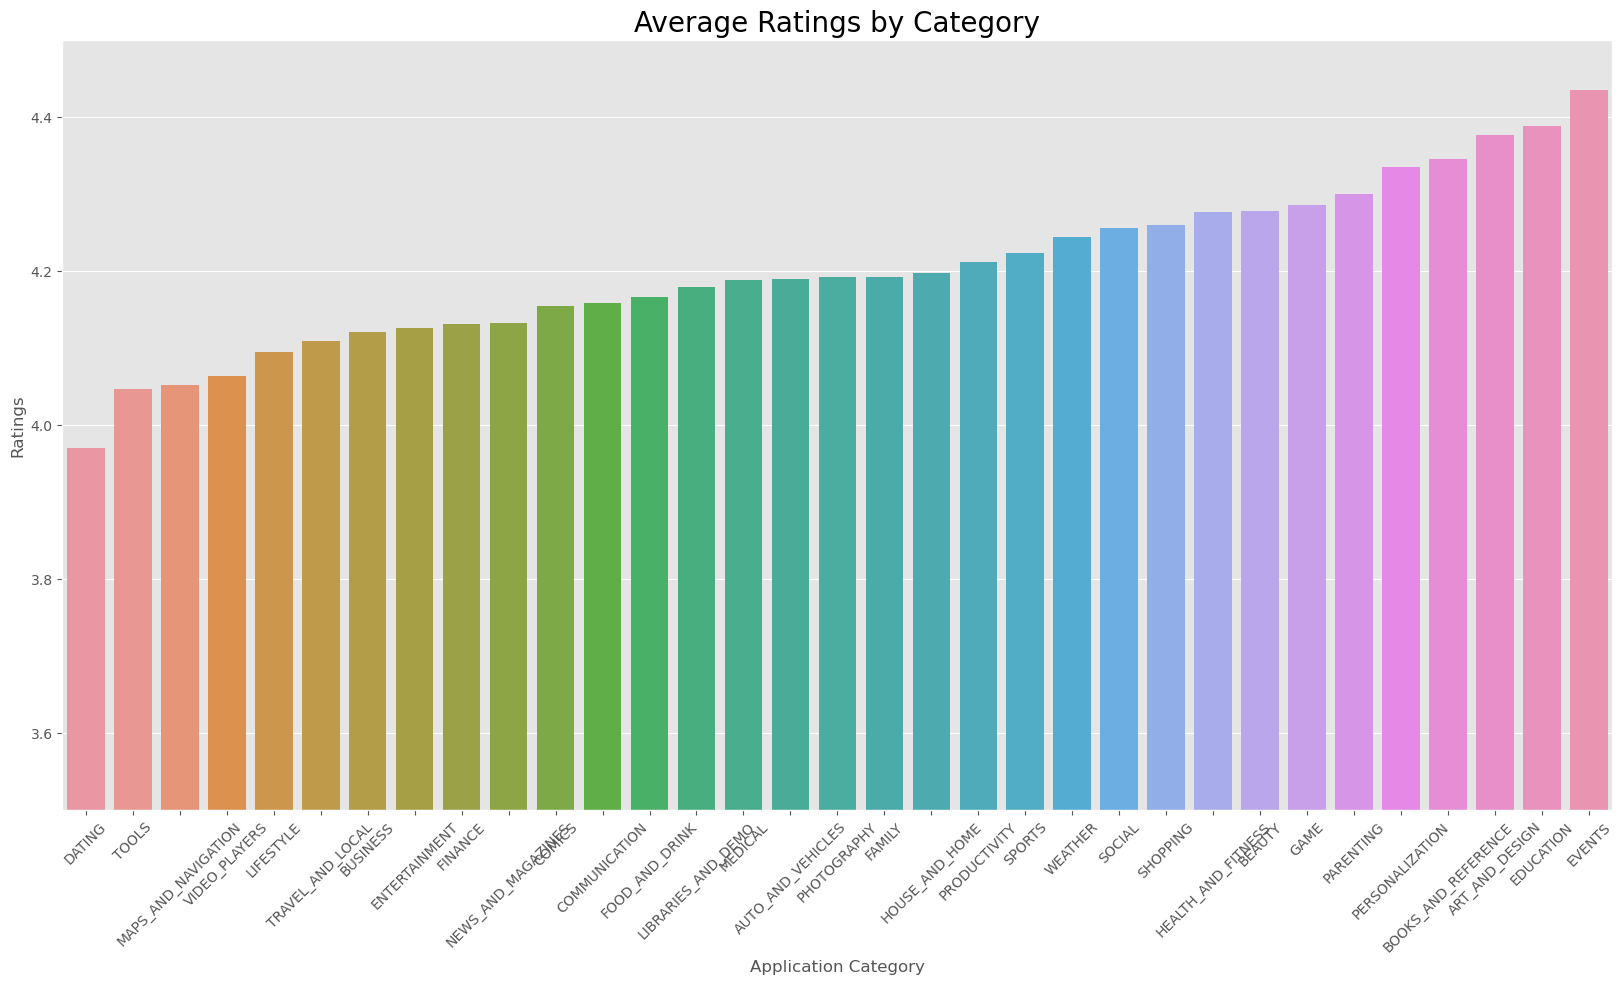

In [338]:
result = df.groupby(["Category"])['Rating'].aggregate(np.mean).reset_index().sort_values('Rating')

plt.figure(figsize=(20,10))
sns.barplot(x=df.Category, y=df.Rating,ci=None,order=result['Category'])

plt.xticks(rotation = 45)
plt.ylim(3.5,4.5)
plt.xlabel('Application Category')
plt.ylabel('Ratings')
plt.title('Average Ratings by Category',size=20)
plt.show()

#### Based on the barplot, the category EVENTS has highest rating and category DATING has lowest rating.

## RATING

In [339]:
df['Rating'].describe()

count    9360.000000
mean        4.191838
std         0.515263
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

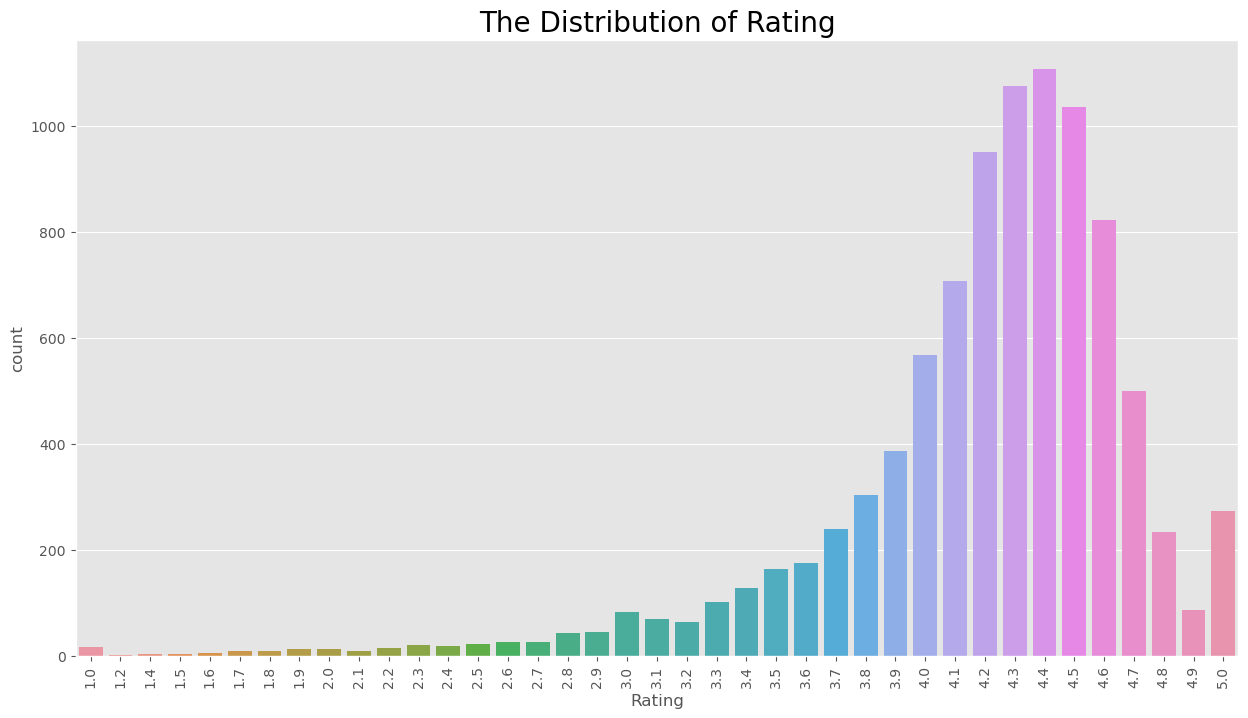

In [340]:
plt.subplots(figsize = (15,8))
plt.xticks(rotation = 90)
plt.title("The Distribution of Rating", size=20)
sns.countplot('Rating', data = df)
plt.show()

In [341]:
print('The average rating in the playstore is', df['Rating'].mean())

The average rating in the playstore is 4.191837606837612


In [342]:
top = np.array(df.Category.value_counts().reset_index()['index'])
print('Most occuring categories are \n', top[:6])

Most occuring categories are 
 ['FAMILY' 'GAME' 'TOOLS' 'PRODUCTIVITY' 'MEDICAL' 'COMMUNICATION']


## Visualizing all the rating separetely

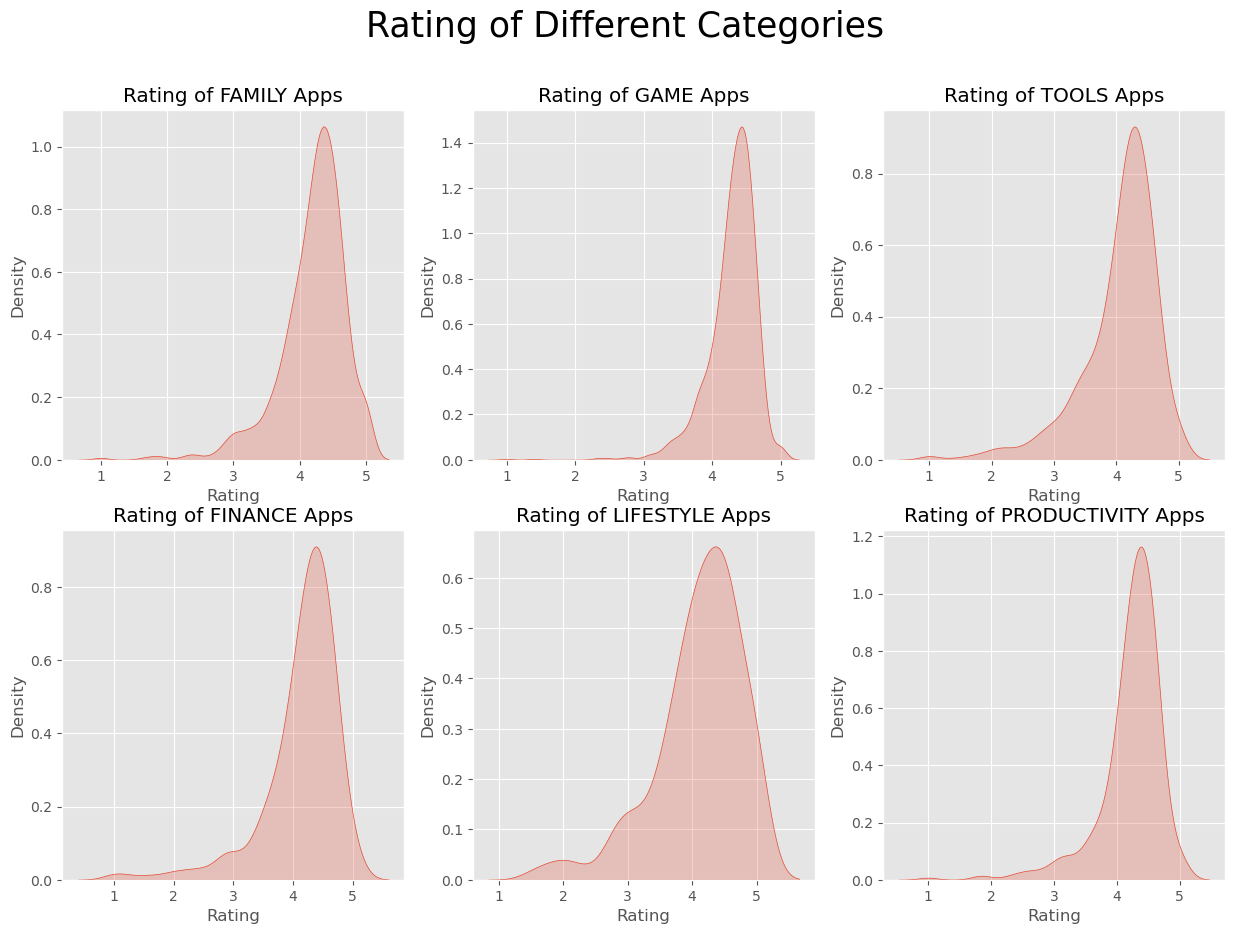

In [343]:
plt.figure(figsize = (15,10))
plt.suptitle("Rating of Different Categories", fontsize = 25)

plt.subplot(2, 3, 1)
sns.kdeplot(df[df['Category']== 'FAMILY']['Rating'], shade = True)
plt.title('Rating of FAMILY Apps')

plt.subplot(2, 3, 2)
sns.kdeplot(df[df['Category']=='GAME']['Rating'], shade = True)
plt.title('Rating of GAME Apps')

plt.subplot(2, 3, 3)
sns.kdeplot(df[df['Category']=='TOOLS']['Rating'], shade = True)
plt.title('Rating of TOOLS Apps')

plt.subplot(2, 3, 4)
sns.kdeplot(df[df['Category']=='FINANCE']['Rating'], shade = True)
plt.title('Rating of FINANCE Apps')

plt.subplot(2, 3, 5)
sns.kdeplot(df[df['Category']=='LIFESTYLE']['Rating'], shade = True)
plt.title('Rating of LIFESTYLE Apps')

plt.subplot(2, 3, 6)
sns.kdeplot(df[df['Category']=='PRODUCTIVITY']['Rating'], shade = True)
plt.title('Rating of PRODUCTIVITY Apps')

# plt.legend(loc='upper left')
plt.show()

## REVIEWS

In [344]:
df['Reviews'].head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: object

Text(0.5, 1.0, 'Distribution of Ratings')

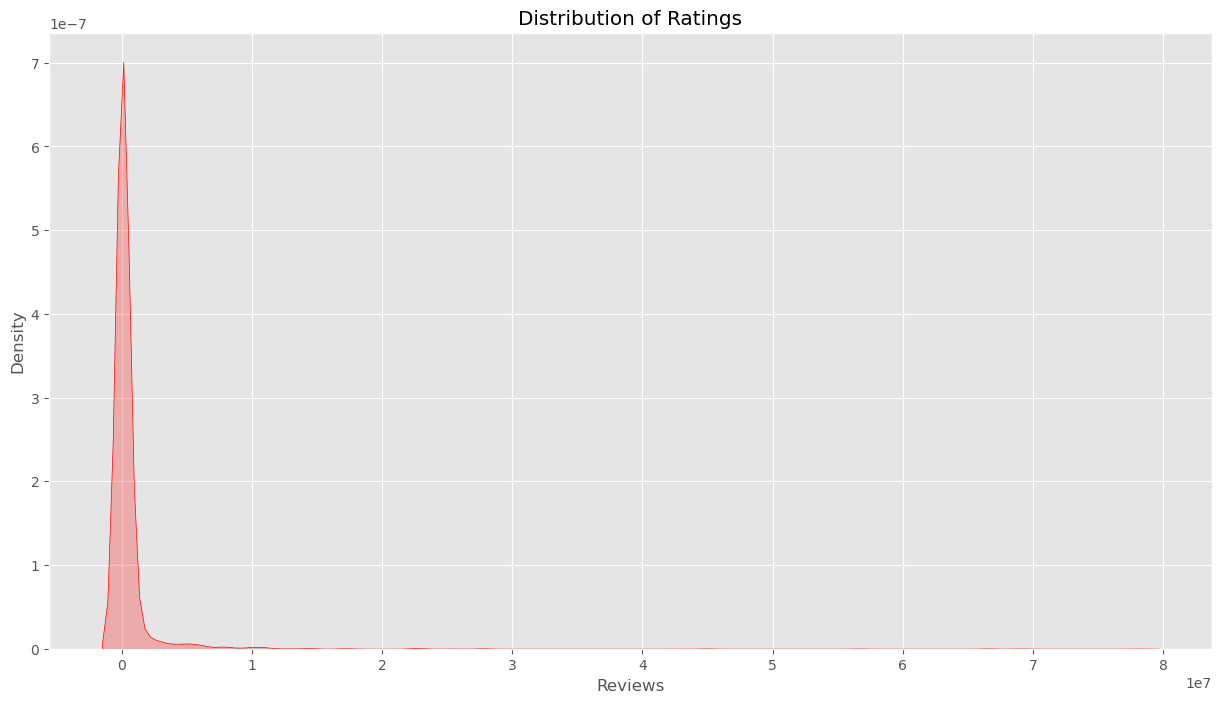

In [345]:
df['Reviews'] = df['Reviews'].astype(dtype = 'int')
plt.figure(figsize=(15, 8))
sns.kdeplot(df['Reviews'], color = 'r', shade = True)
plt.title('Distribution of Ratings')

In [346]:
print("Number of Apps with more than 1M reviews",df[df['Reviews'] > 1000000].shape[0])
print("\nTop 20 apps with most reviews: \n",df[df['Reviews'] > 1000000].sort_values(by = 'Reviews', ascending = False).head(20)['App'])

Number of Apps with more than 1M reviews 704

Top 20 apps with most reviews: 
 2544                                    Facebook
3943                                    Facebook
336                           WhatsApp Messenger
381                           WhatsApp Messenger
3904                          WhatsApp Messenger
2604                                   Instagram
2611                                   Instagram
2545                                   Instagram
3909                                   Instagram
382     Messenger – Text and Video Chat for Free
4104    Messenger – Text and Video Chat for Free
335     Messenger – Text and Video Chat for Free
1879                              Clash of Clans
1704                              Clash of Clans
1670                              Clash of Clans
3986                              Clash of Clans
4005     Clean Master- Space Cleaner & Antivirus
1917                              Subway Surfers
1872                              Subwa

Text(0.5, 1.0, 'Rating VS Reveiws')

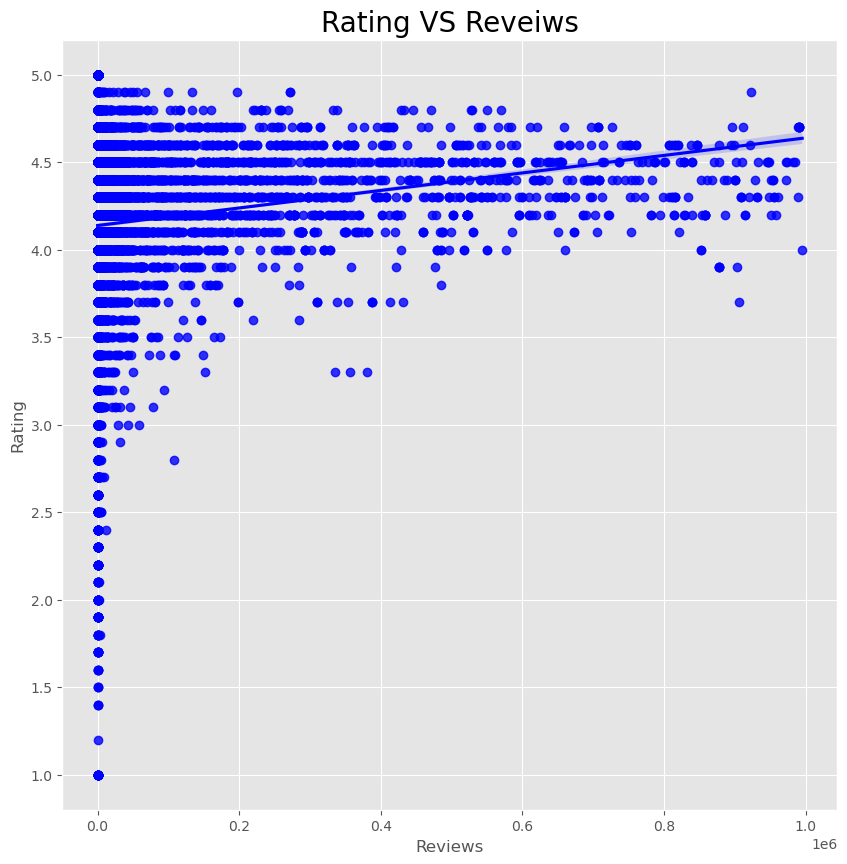

In [347]:
plt.figure(figsize = (10,10))
sns.regplot(x="Reviews", y="Rating", color = 'blue',data=df[df['Reviews']<1000000]);
plt.title('Rating VS Reveiws',size = 20)

#### The applications with more reviews get higher ratings.

#### Plot the number of reviews for each category

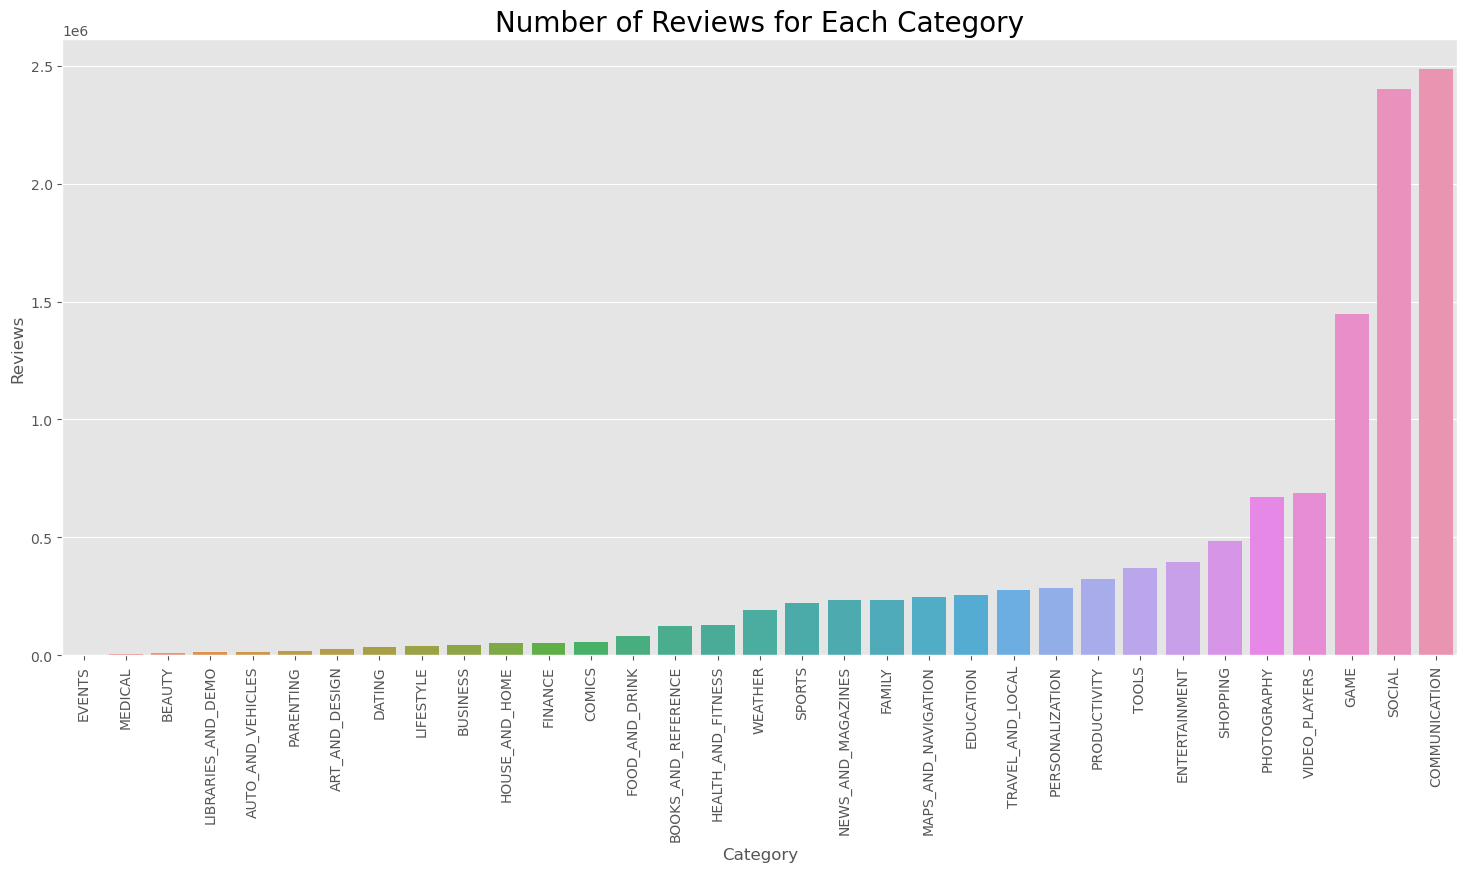

In [348]:
result1 = df.groupby(["Category"])['Reviews'].aggregate(np.mean).reset_index().sort_values('Reviews')

plt.subplots(figsize = (18,8))
plt.xticks(rotation = 90)
sns.barplot('Category','Reviews', ci=None, data = df, order=result1['Category'])
plt.title('Number of Reviews for Each Category',size=20)
plt.show()

#### Based on the barplot, the category SOCIAL received most reviews and category EVENTS have least reviews.

#### Plot the average installs for each category

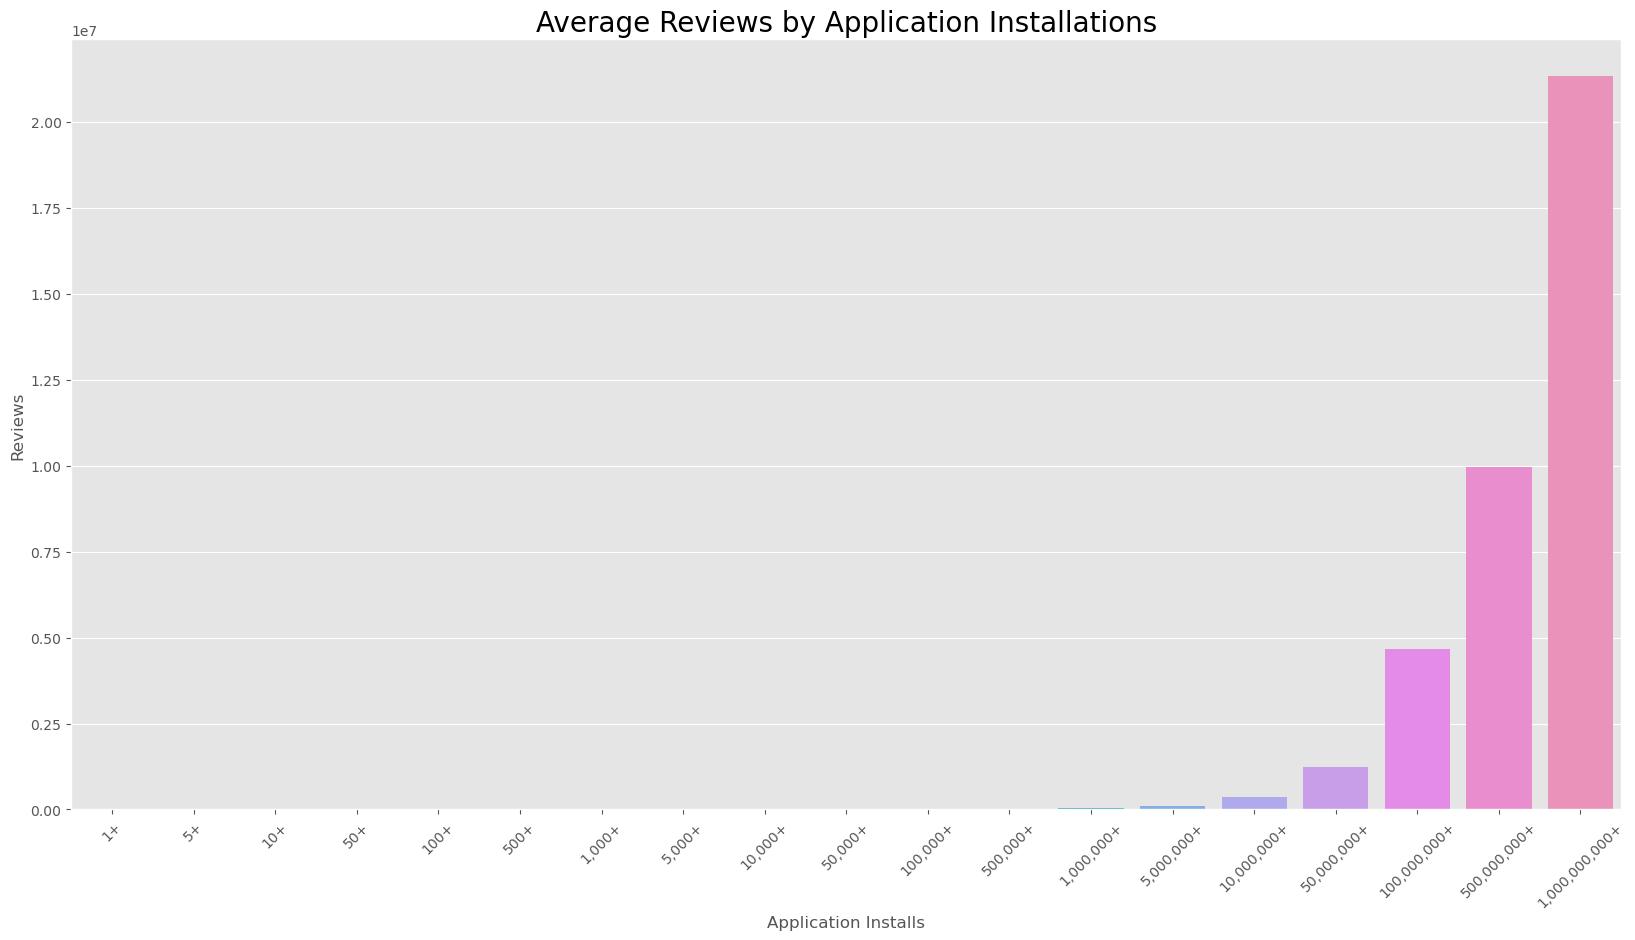

In [349]:
result3 = df.groupby(["Installs"])['Reviews'].aggregate(np.mean).reset_index().sort_values('Reviews')

plt.figure(figsize=(20,10))
sns.barplot(x=df.Installs, y=df.Reviews,ci=None,order=result3['Installs'])

plt.xticks(rotation = 45)
plt.xlabel('Application Installs')
plt.ylabel('Reviews')
plt.title('Average Reviews by Application Installations',size=20)
plt.show()

#### Based on the barplot, the most installed application got lots of reviews.

For all apps more than 1M reviews


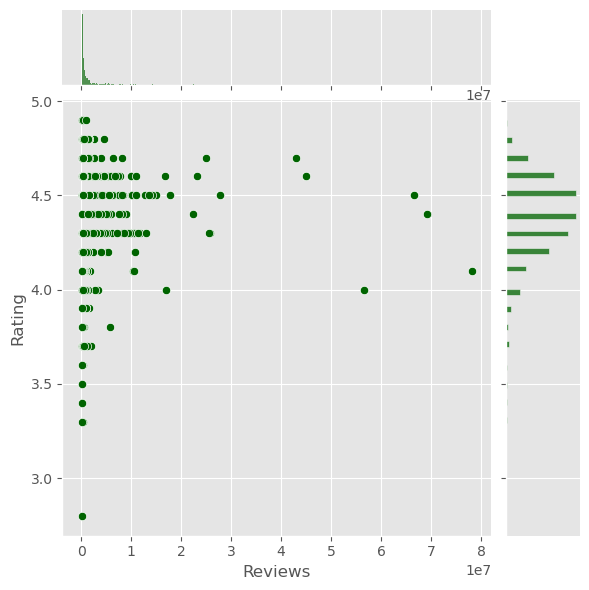

In [350]:
print('For all apps more than 1M reviews')
sns.jointplot(x= 'Reviews', y='Rating',data =df[df['Reviews']> 100000], color = 'darkgreen')
plt.show()

For all apps more than 1M reviews


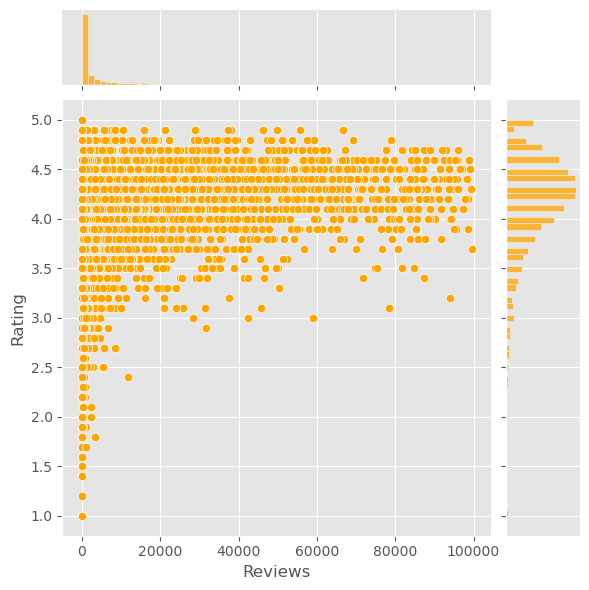

In [351]:
print('For all apps more than 1M reviews')
sns.jointplot(x= 'Reviews', y='Rating',data =df[df['Reviews']< 100000], color = 'orange')
plt.show()

#### Observation ( Join plot) The most reviewws apps are likely to be better rated

## Installs

In [352]:
df['Installs'].describe()

count           9360
unique            19
top       1,000,000+
freq            1576
Name: Installs, dtype: object

Since the datatype here is object so we need to convert it to integer for futher plotting

Removing all the commas and plus sign

In [354]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',',''))
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+',''))
df['Installs'] = df['Installs'].astype(dtype = 'int')

In [355]:
df['Installs'].head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int32

In [356]:
df['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,        100,        500,
               10,          5,         50,          1])

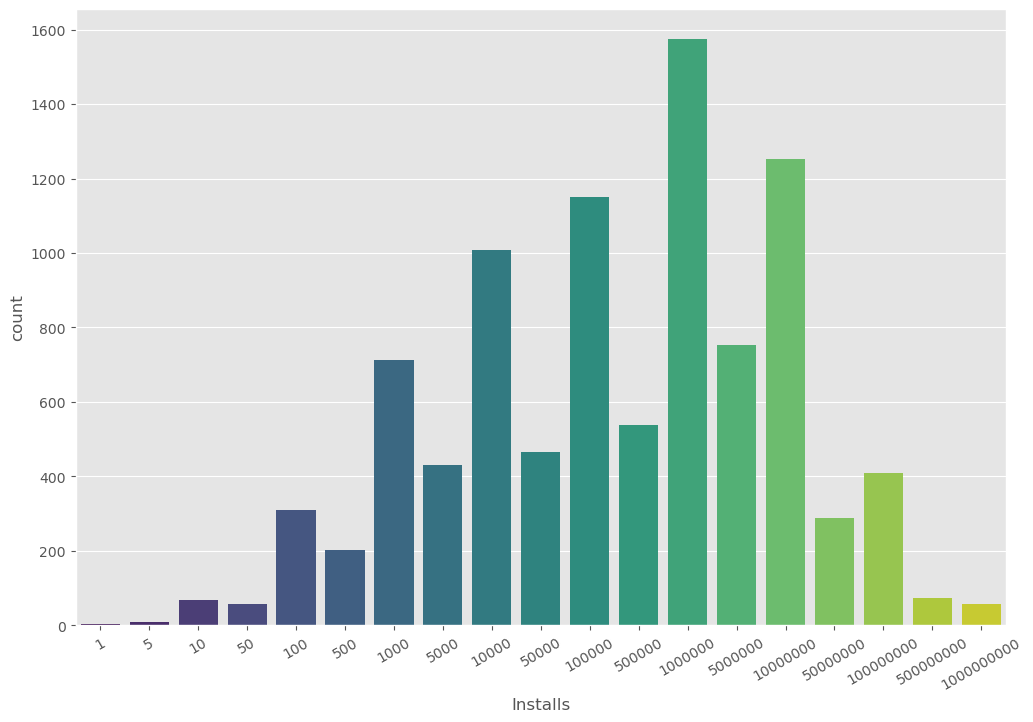

In [357]:
plt.figure(figsize=(12, 8))
f = sns.countplot(df['Installs'], palette= "viridis" )
f.set_xticklabels(f.get_xticklabels(), rotation = 30)
plt.show()

#### We can observe that most of the apps belong to the 1M+ category

In [358]:
sorted_values = sorted(df['Installs'].unique())
df['Installs Classes'] = df['Installs'].replace(sorted_values, range(0,len(sorted_values)))
df['Installs Classes'].head()

0     8
1    11
2    13
3    15
4    10
Name: Installs Classes, dtype: int32

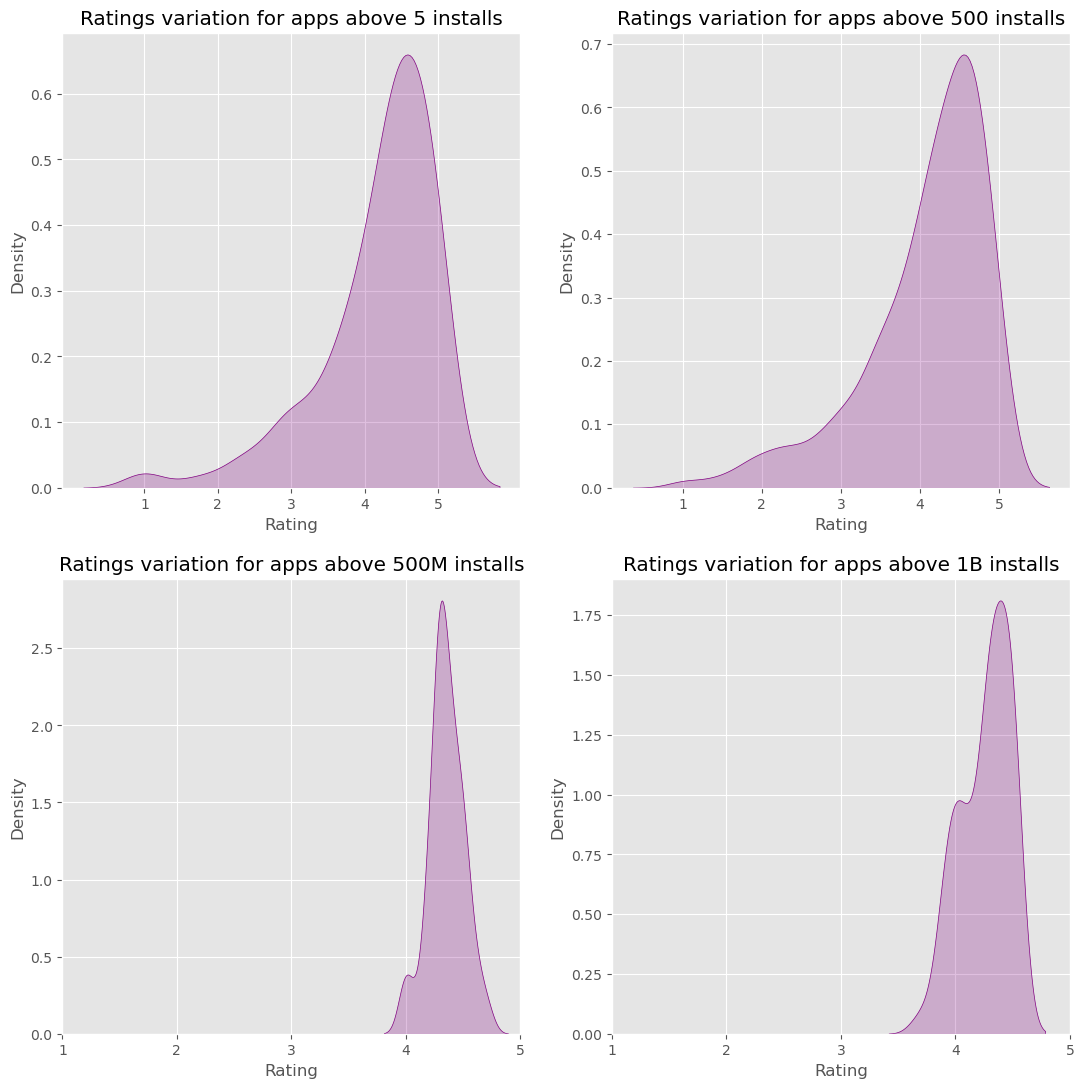

Variation in Rating of installs above 100 installs  0.1915128770160852
Variation in Rating of installs above 500 installs  0.19278612435902398
Variation in Rating of installs above 500M installs  0.034482758620689655
Variation in Rating of installs above 1B installs  0.04953189390178826


In [359]:
import scipy.stats as sp

plt.figure(figsize=(13,13))
plt.subplot(2,2,1)
f = sns.kdeplot(df[df['Installs Classes'] == 5]['Rating'], shade = True, color = 'purple')
plt.title("Ratings variation for apps above 5 installs")
f.set_xticks([1,2,3,4,5])

plt.subplot(2,2,2)
f = sns.kdeplot(df[df['Installs Classes'] == 6]['Rating'], shade = True, color = 'purple')
plt.title("Ratings variation for apps above 500 installs")
f.set_xticks([1,2,3,4,5])

plt.subplot(2,2,3)
f = sns.kdeplot(df[df['Installs Classes'] == 17]['Rating'], shade = True, color = 'purple')
plt.title("Ratings variation for apps above 500M installs")
f.set_xticks([1,2,3,4,5])

plt.subplot(2,2,4)
f = sns.kdeplot(df[df['Installs Classes'] == 18]['Rating'], shade = True, color = 'purple')
plt.title("Ratings variation for apps above 1B installs")
f.set_xticks([1,2,3,4,5])

plt.show()
print("Variation in Rating of installs above 100 installs ",sp.variation(df[df['Installs Classes'] == 5]['Rating']))
print("Variation in Rating of installs above 500 installs ",sp.variation(df[df['Installs Classes'] == 6]['Rating']))
print("Variation in Rating of installs above 500M installs ",sp.variation(df[df['Installs Classes'] == 17]['Rating']))
print("Variation in Rating of installs above 1B installs ",sp.variation(df[df['Installs Classes'] == 18]['Rating']))

## Size

In [360]:
df['Size'].head()

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
Name: Size, dtype: object

In [361]:
print(df['Size'].unique())

['19M' '14M' '8.7M' '25M' '2.8M' '5.6M' '29M' '33M' '3.1M' '28M' '12M'
 '20M' '21M' '37M' '5.5M' '17M' '39M' '31M' '4.2M' '23M' '6.0M' '6.1M'
 '4.6M' '9.2M' '5.2M' '11M' '24M' 'Varies with device' '9.4M' '15M' '10M'
 '1.2M' '26M' '8.0M' '7.9M' '56M' '57M' '35M' '54M' '201k' '3.6M' '5.7M'
 '8.6M' '2.4M' '27M' '2.7M' '2.5M' '7.0M' '16M' '3.4M' '8.9M' '3.9M'
 '2.9M' '38M' '32M' '5.4M' '18M' '1.1M' '2.2M' '4.5M' '9.8M' '52M' '9.0M'
 '6.7M' '30M' '2.6M' '7.1M' '22M' '6.4M' '3.2M' '8.2M' '4.9M' '9.5M'
 '5.0M' '5.9M' '13M' '73M' '6.8M' '3.5M' '4.0M' '2.3M' '2.1M' '42M' '9.1M'
 '55M' '23k' '7.3M' '6.5M' '1.5M' '7.5M' '51M' '41M' '48M' '8.5M' '46M'
 '8.3M' '4.3M' '4.7M' '3.3M' '40M' '7.8M' '8.8M' '6.6M' '5.1M' '61M' '66M'
 '79k' '8.4M' '3.7M' '118k' '44M' '695k' '1.6M' '6.2M' '53M' '1.4M' '3.0M'
 '7.2M' '5.8M' '3.8M' '9.6M' '45M' '63M' '49M' '77M' '4.4M' '70M' '9.3M'
 '8.1M' '36M' '6.9M' '7.4M' '84M' '97M' '2.0M' '1.9M' '1.8M' '5.3M' '47M'
 '556k' '526k' '76M' '7.6M' '59M' '9.7M' '78M' '72M' '4

There's an weird observation as a value has label like 'Varies with device' rather than the actual size.
So we better replace it with some mean or median values

There are two problems with this column:

It contains values named 'Varies with device' It contains Ms and ks in the size Type of values is string We can't omit the Ms and Ks since that would mess up the KB and MB size scale.
So we convert the MBs to KBs. One way to do this is below.

In [362]:
df['Size'] = df['Size'].apply(lambda x: x.replace('M', '*1000'))
df['Size'] = df['Size'].apply(lambda x: x.replace('k', ''))

In [363]:
df['Size'].replace('Varies with device', '-1', inplace = True)

In [364]:
df['Size'] = df['Size'].apply(lambda x: eval(x))

In [365]:
df['Size'] = df['Size'].replace(-1,np.nan) #Changing the values to null then we can fill them with mean value
df['Size'].fillna(np.mean(df['Size']), inplace = True)

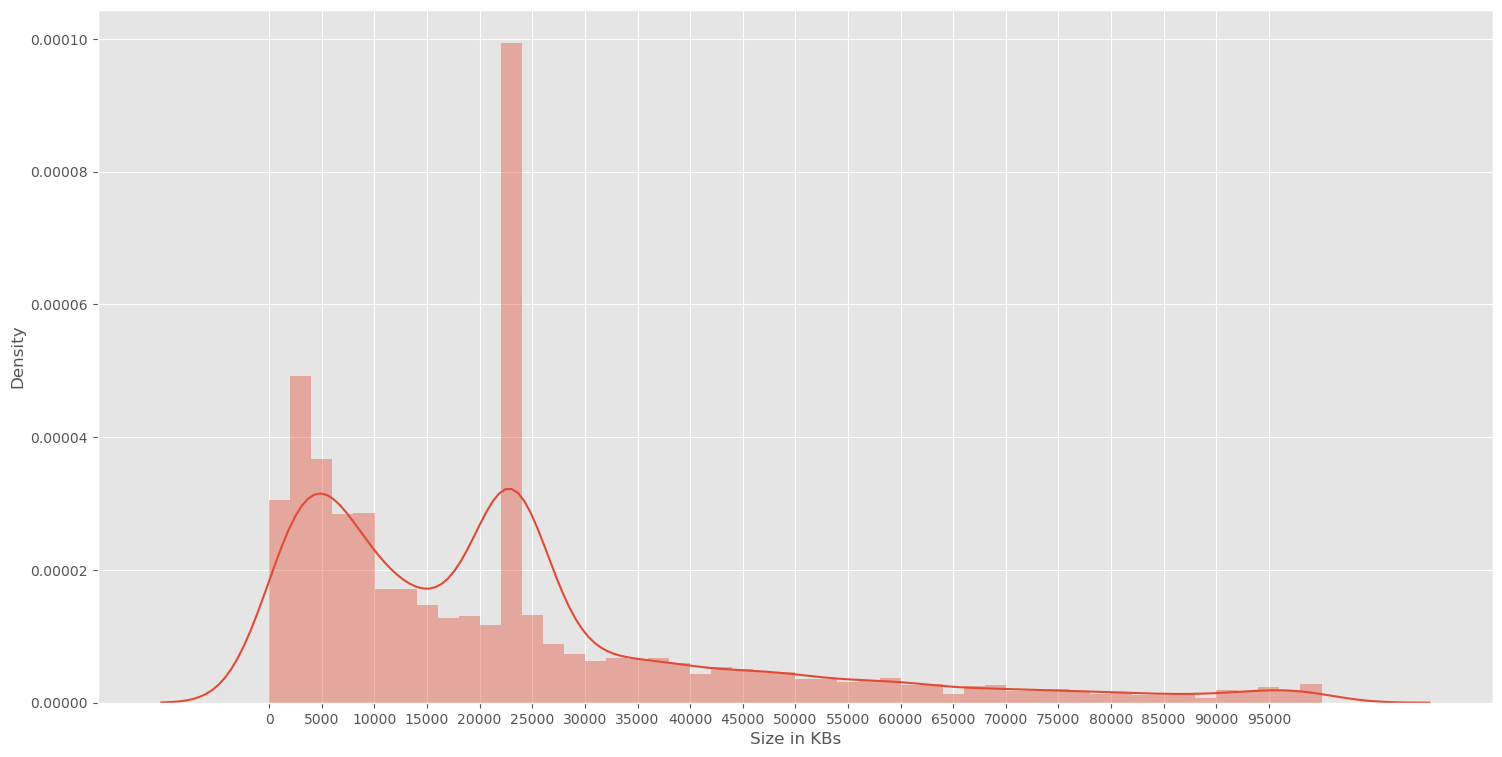

In [366]:
plt.figure(figsize=(18, 9))
sns.distplot(df['Size'])
plt.xlabel('Size in KBs')
plt.xticks(list(range(0, int(max(df['Size'])), 5000)),rotation = 0)
plt.show()

From the above graph we can easily see that apps with size 4-5MB or 20-25MB are more likely to be downloaded

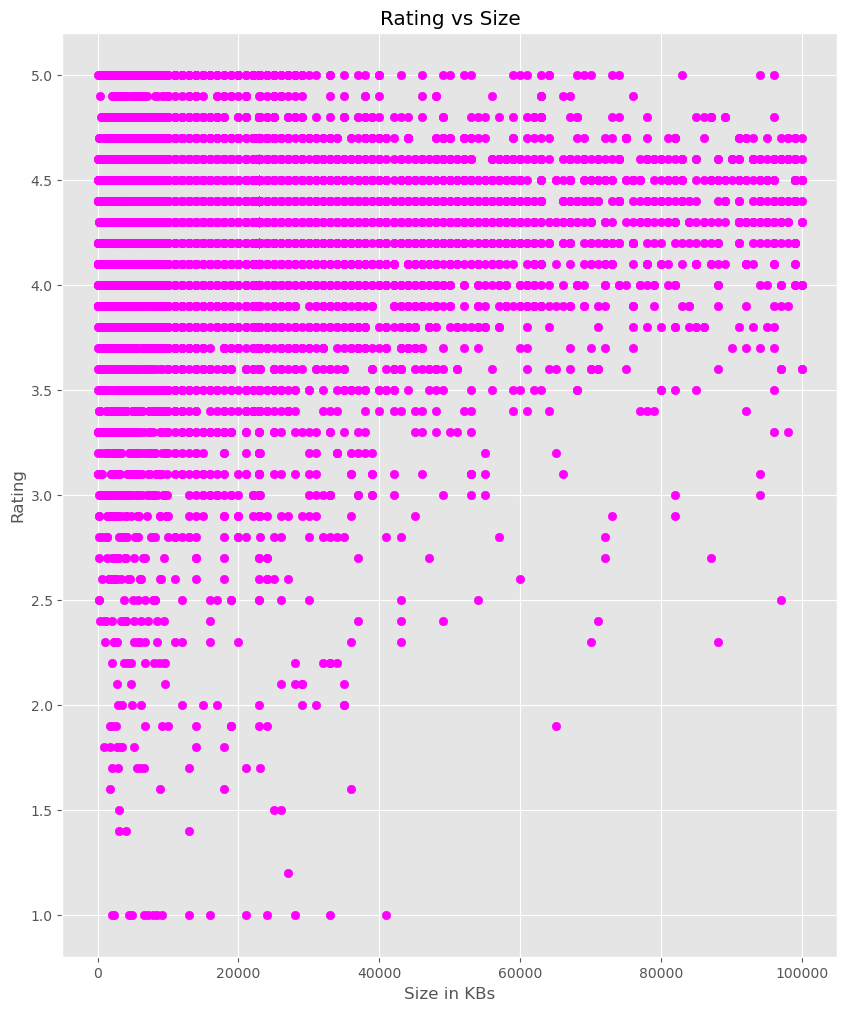

In [367]:
plt.figure(figsize=(10, 12))
plt.scatter(df['Size'], y = df['Rating'], color = 'magenta')
plt.xlabel('Size in KBs')
plt.ylabel('Rating')
plt.title('Rating vs Size')
plt.show()

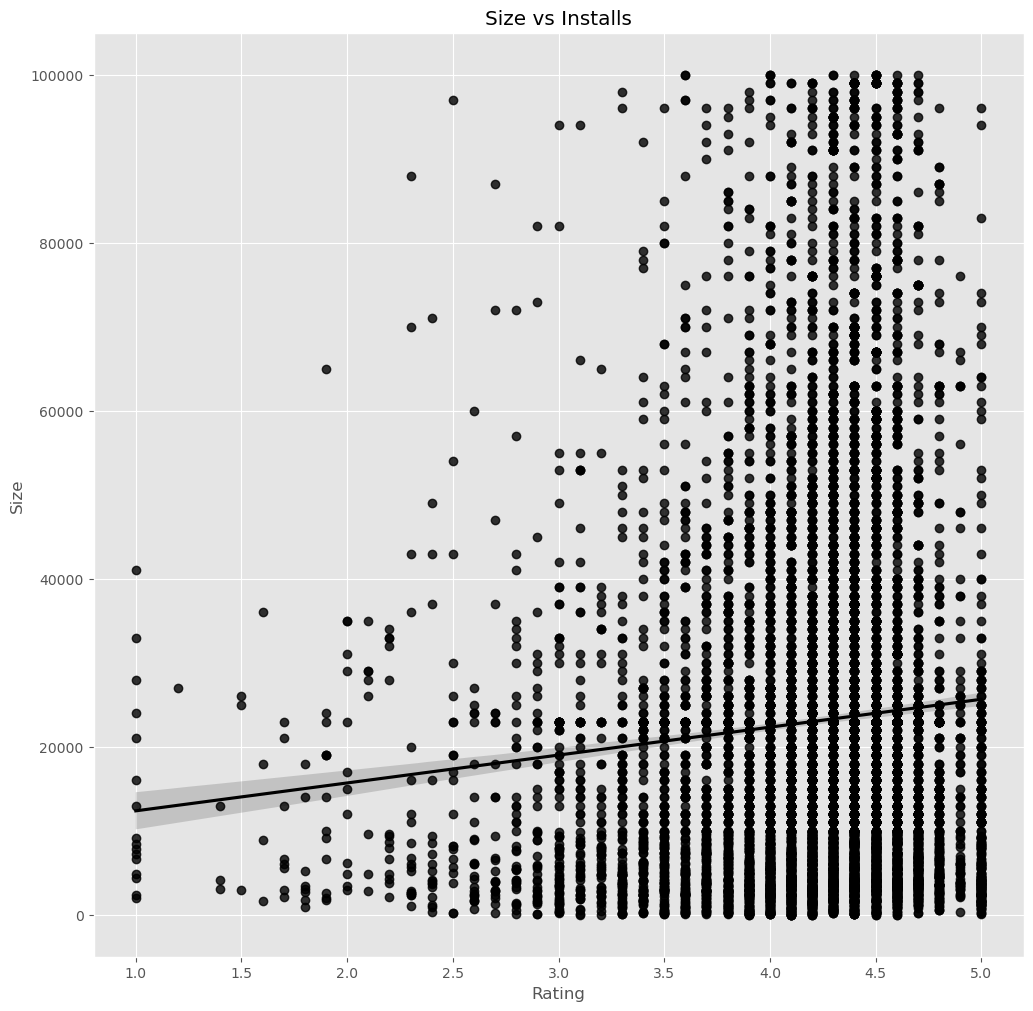

In [368]:
plt.figure(figsize=(12, 12))
sns.regplot(y=df['Size'], x = df['Rating'], color = 'black')
plt.title('Size vs Installs')
plt.show()

# TYPE

In [369]:
df['Type'].head()

0    Free
1    Free
2    Free
3    Free
4    Free
Name: Type, dtype: object

In [370]:
df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

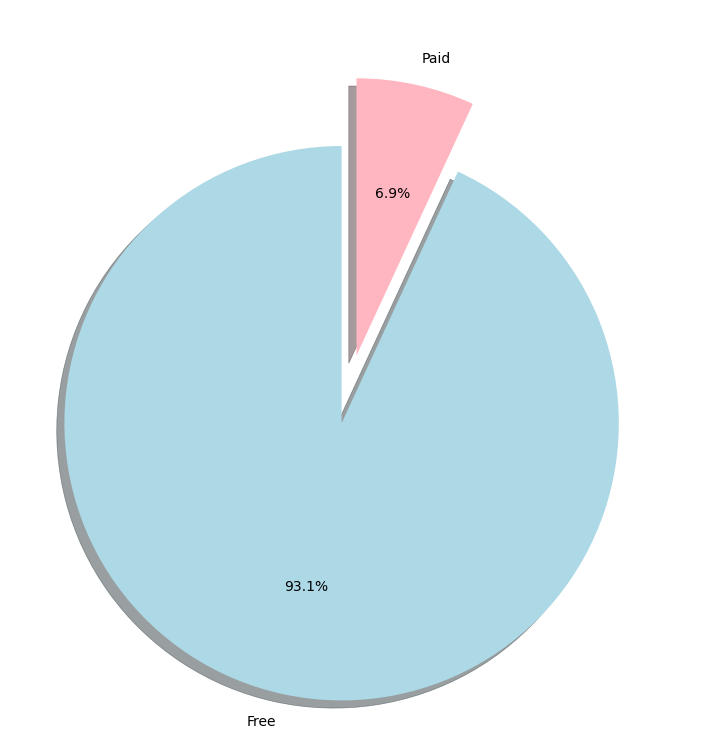

In [371]:
temp = df['Type'].value_counts().reset_index()
rcParams['figure.figsize'] = 9,9
plt.pie(x = temp['Type'], labels= temp['index'], autopct= '%1.1f%%', colors = ['lightblue','lightpink'], 
        shadow= True,startangle=90,explode=(0.25,0))
plt.show()

# PRICE

In [372]:
df['Price'].head()

0    0
1    0
2    0
3    0
4    0
Name: Price, dtype: object

In [373]:
df['Price']=df['Price'].apply( lambda x: x.replace('$',''))
df['Price']=df['Price'].astype('float')

In [374]:
df['Price'].astype(float)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10834    0.0
10836    0.0
10837    0.0
10839    0.0
10840    0.0
Name: Price, Length: 9360, dtype: float64

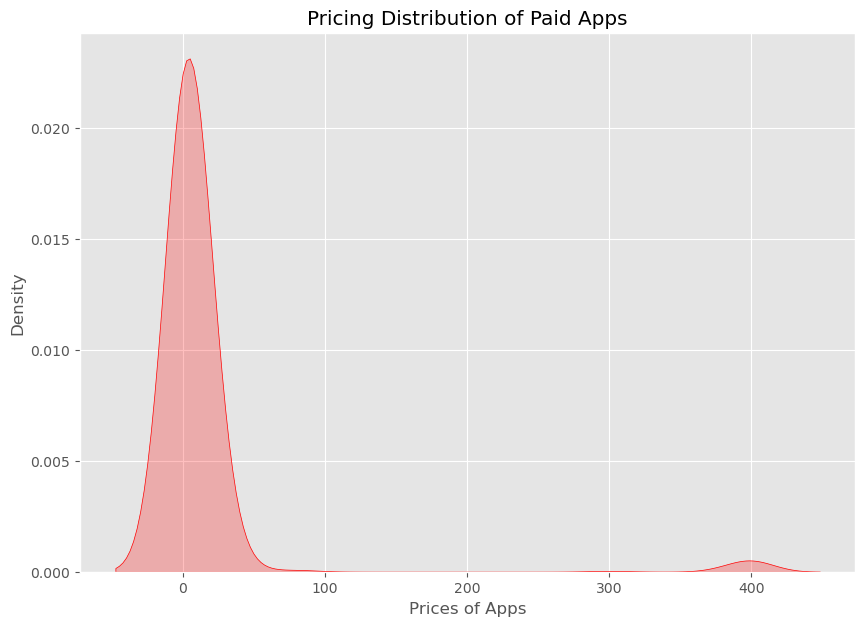

In [375]:
plt.figure(figsize=(10,7))
sns.kdeplot(df[df['Type'] == 'Paid']['Price'], color = 'red', shade = True)
plt.xlabel('Prices of Apps')
plt.title('Pricing Distribution of Paid Apps')
plt.show()

We Can Observe That majority of the paid apps are affordable

# Rating Vs Pricing

In [376]:
A = df[df['Type'] == 'Paid']

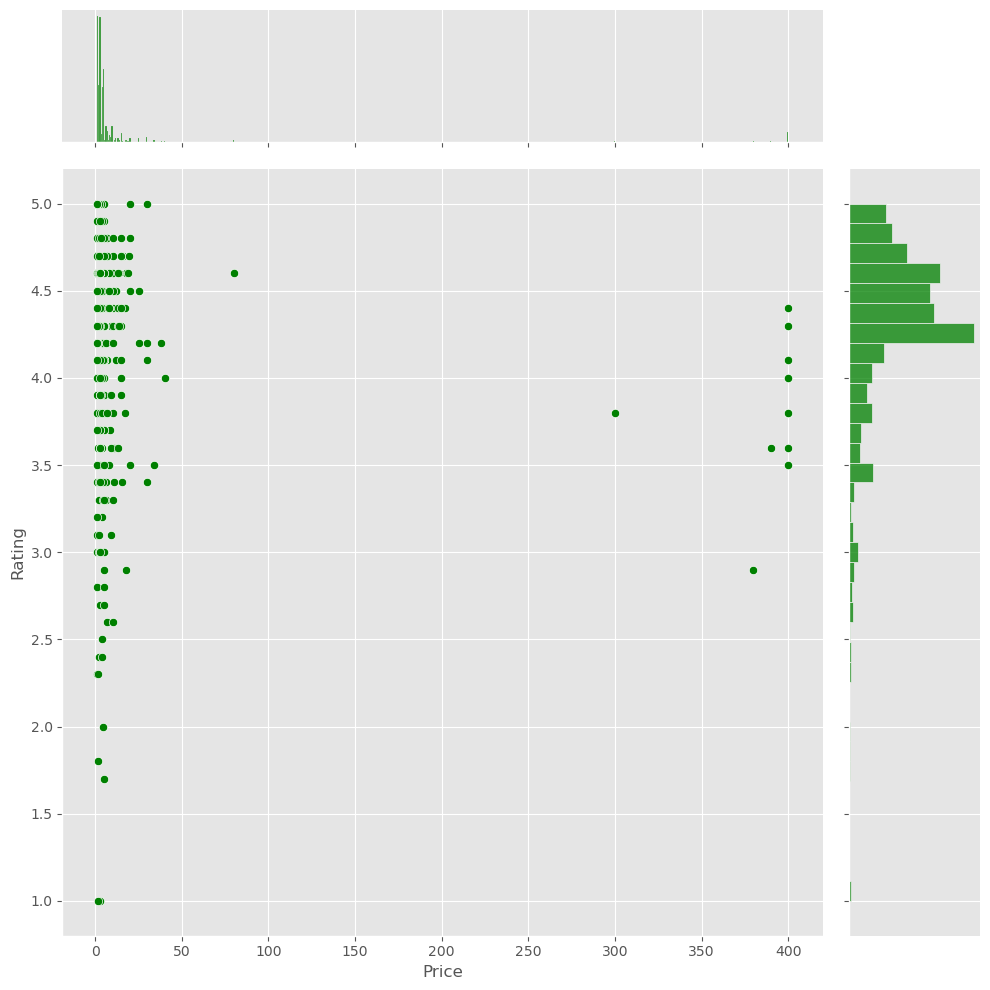

In [377]:
sns.jointplot(y = A['Rating'], x = A['Price'], color = 'green', size=10)

## Content Rating

Plot the countplot of Content Rating

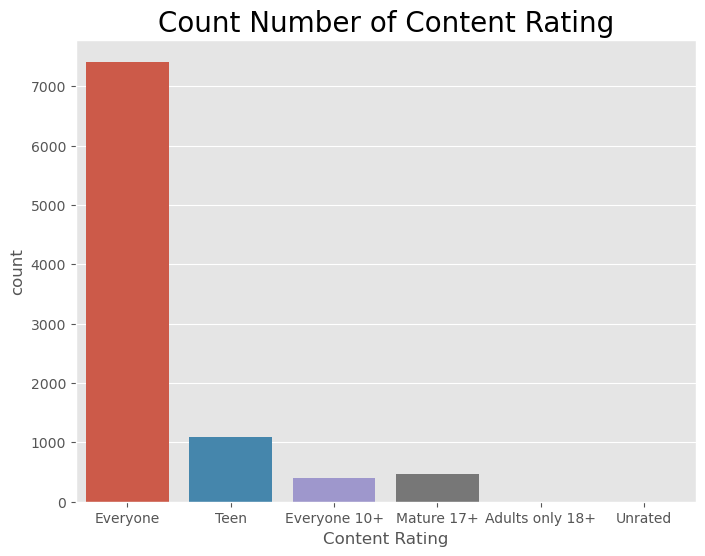

In [378]:
plt.figure(figsize = (8,6))
plt.title('Count Number of Content Rating',size=20)
sns.countplot(df['Content Rating'])
plt.show()

Basically most applications got ratings from Everyone.

In [379]:
df.isnull().sum()

App                 0
Category            0
Rating              0
Reviews             0
Size                0
Installs            0
Type                0
Price               0
Content Rating      0
Genres              0
Last Updated        0
Current Ver         0
Android Ver         0
Installs Classes    0
dtype: int64

In [380]:
df['Installs'].head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int32

## Applying Machine Learning Model

In [298]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [299]:
# Convert the Installs column to a binary feature
df['Installs_binary'] = df['Installs'].apply(lambda x: 1 if x >= 100000 else 0)

In [300]:
# Define the target and predictor variables
target = df['Installs_binary']
predictors = df['Rating']

In [301]:
# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state=0)

In [302]:
# Construct the logistic regression model
lr = LogisticRegression()
lr.fit(X_train.values.reshape(-1,1), y_train.ravel())

LogisticRegression()

In [303]:
# Use the model to predict the target variable for the test set
y_pred = lr.predict(X_test.values.reshape(-1,1))

In [304]:
# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[  69  910]
 [  16 1813]]


In [305]:
# Calculate and print the sensitivity
tp = confusion_matrix(y_test, y_pred)[1][1]
fn = confusion_matrix(y_test, y_pred)[1][0]
sensitivity = tp / (tp + fn)
print("Sensitivity: ", sensitivity)

Sensitivity:  0.9912520503007107


In [306]:
# Calculate and print the specificity
tn = confusion_matrix(y_test, y_pred)[0][0]
fp = confusion_matrix(y_test, y_pred)[0][1]
specificity = tn / (tn + fp)
print("Specificity: ", specificity)

Specificity:  0.07048008171603677


## Conclusion:

From this Project the are primary goals , to identify the best performance and worst performance. The category "EVENTS" app has highest rating and category "DATING" app has lowest rating. and the average rating 4.19. and perform some visualization based on rating and installation and apply some macine learning model.


Interpretation:
    

1. The confusion matrix shows that there were 69 true negatives (apps with low ratings that didn't have many installs), 910 false positives (apps with low ratings that had many installs), 16 false negatives (apps with high ratings that didn't have many installs), and 1813 true positives (apps with high ratings that had many installs).


2. The sensitivity of the model is high at 0.99, which means that it correctly identifies 99.1% of the apps that have high ratings and many installs.


3. The specificity of the model is low at 0.070, which means that it correctly identifies only 7.0% of the apps that have low ratings and few installs.
